<a href="https://colab.research.google.com/github/charchit319/miniproject_datamining/blob/main/DataMining_Model_Training_and_Comparision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> **Setting up to read data in google collab from Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


> **Importing Necessary library**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import pickle
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score, f1_score

In [ ]:
X = pd.read_pickle('/content/drive/MyDrive/EDA_Datamining.pkl')
Y = pd.read_pickle('/content/drive/MyDrive/EDA_Datamining_label.pkl')

In [ ]:
display(X)

,0,1,2,3,4,5,6
0,0.450980,0.262745,0.521569,0.483865,0.374758,0.5664,0.501579
1,0.423529,0.231373,0.490196,0.483865,0.374758,0.5664,0.501579
2,0.380392,0.196078,0.443137,0.483865,0.374758,0.5664,0.501579
3,0.317647,0.247059,0.352941,0.483865,0.374758,0.5664,0.501579
4,0.239216,0.278431,0.294118,0.483865,0.374758,0.5664,0.501579
...,...,...,...,...,...,...,...
11509046,0.439216,0.282353,0.596078,0.384084,0.289174,0.7744,0.690361
11509047,0.470588,0.305882,0.607843,0.384084,0.289174,0.7744,0.690361
11509048,0.392157,0.360784,0.611765,0.384084,0.289174,0.7744,0.690361
11509049,0.388235,0.388235,0.619608,0.384084,0.289174,0.7744,0.690361


In [ ]:
display(Y)

0           2.0
1           2.0
2           2.0
3           2.0
4           2.0
           ... 
11509046    2.0
11509047    2.0
11509048    2.0
11509049    2.0
11509050    2.0
Name: label, Length: 11509051, dtype: float64

> **Principal Component Analysis**
>> *The Principal Component Analysis [about PCA](https://www.simplilearn.com/tutorials/machine-learning-tutorial/principal-component-analysis) is a popular unsupervised learning technique for reducing the dimensionality of large data sets. It increases interpretability yet, at the same time, it minimizes information loss. It helps to find the most significant features in a dataset and makes the data easy for plotting in 2D and 3D. PCA helps in finding a sequence of linear combinations of variables.*

>>![Image](https://www.simplilearn.com/ice9/free_resources_article_thumb/PrincipalComponents.PNG)

>>In the above figure, we have several points plotted on a 2-D plane. There are two principal components. PC1 is the primary principal component that explains the maximum variance in the data. PC2 is another principal component that is orthogonal to PC1.

In [ ]:
from sklearn.decomposition import PCA
# Creating a PCA instance with a specified explained variance ratio of 0.95
pca = PCA(0.95)
# Fitting the PCA model on the data
X_pca = pca.fit_transform(X)

In [ ]:
type(X_pca)

numpy.ndarray

In [ ]:
evr = pca.explained_variance_ratio_
n_comp = pca.n_components_
print(f'\033[1mExplained Variance Ratio of Principal Component is \033[0m {evr}\n')
print(f'\033[1mEstimated Number of Component is\033[0m {n_comp}.')

Explained Variance Ratio of Principal Component is  [0.41188551 0.24242547 0.08978937 0.08022101 0.06815647 0.06145197]

Estimated Number of Component is 6.


> **Showing the Explained Variance Ratio obtained from PCA in interactive graph**

In [ ]:
cumulative_explained_variance = np.cumsum(evr)
trace = go.Scatter(
    x=np.arange(1, len(cumulative_explained_variance) + 1),
    y=cumulative_explained_variance,
    mode='lines+markers',
    line=dict(color='blue', width=2, dash='dashdot'),
    marker=dict(symbol='circle', size=8),
    name='Cumulative Explained Variance'
)
layout = go.Layout(
    title="Principal Component Analysis",
    title_font=dict(size=20, family='Arial', color='black'),
    xaxis=dict(title='n_component'),
    yaxis=dict(title='Cumulative Explained Variance Ratio', tickvals=np.arange(0.40, 1.05, 0.05)),
    showlegend=True
)
fig = go.Figure(data=[trace], layout=layout)
fig.show()

> **Train Test Split**
>> *Train test split is a model validation procedure that allows you to simulate how a model would perform on new/unseen data. Here is how the procedure works:*
>>![image](https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/1_train-test-split_0.jpg)


In [ ]:
# Split the data into training and testing sets
# - 'test_size' which specifies out of 100 percent 20 percent is used for testing
# - 'random_state' sets the seed for reproducibility
X_train,X_test,y_train,y_test = train_test_split(X_pca,Y,test_size=0.2,random_state=20)

> **Random Forest Classifier**
>> *Random Forest [about Random Forest](https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/) is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.*

>>As the name suggests, "Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset." Instead of relying on one decision tree, the random forest takes the prediction from each tree and based on the majority votes of predictions, and it predicts the final output.

>>The below diagram explains the working of the Random Forest algorithm:

>>![image](https://static.javatpoint.com/tutorial/machine-learning/images/random-forest-algorithm.png)

In [ ]:
# Creating a RandomForestClassifier instance with 100 decision trees and a fixed random seed for reproducibility
clf = RandomForestClassifier(n_estimators=100, random_state=42)
# Fitting the RandomForestClassifier on the training data
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
pickle.dump(clf , open('/content/drive/MyDrive/Random_Forest_model.pk1' , 'wb'))

> **Decision Tree Classifier**

>> *A decision tree [about Decision Tree](https://www.analyticsvidhya.com/blog/2021/08/decision-tree-algorithm/) is a non-parametric supervised learning algorithm for classification and regression tasks.*

>>*Decision trees are upside down which means the root is at the top and then this root is split into various several nodes. Decision trees are nothing but a bunch of if-else statements in layman terms. It checks if the condition is true and if it is then it goes to the next node attached to that decision.*

>>*Let’s understand decision trees with the help of an example:* ![image](https://av-eks-blogoptimized.s3.amazonaws.com/905753.png)

>> *In the below diagram the tree will first ask what is the weather? Is it sunny, cloudy, or rainy? If yes then it will go to the next feature which is humidity and wind. It will again check if there is a strong wind or weak, if it’s a weak wind and it’s rainy then the person may go and play.* ![image](https://av-eks-blogoptimized.s3.amazonaws.com/542834.png)

In [ ]:
# Creating a DecisionTreeClassifier instance
DT = DecisionTreeClassifier()
# Fitting the DecisionTreeClassifier on the training data
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
importances_decision_tree = DT.feature_importances_
importances_decision_tree

array([0.48078516, 0.27771546, 0.03500555, 0.02978862, 0.06578123,
       0.11092399])

In [ ]:
importances_RFC = clf.feature_importances_
importances_RFC

array([0.51112893, 0.19396272, 0.05566886, 0.05135409, 0.08589409,
       0.10199132])

In [ ]:
pickle.dump(DT , open('/content/drive/MyDrive/Decision_Tree_model.pk1' , 'wb'))

> **Multinomial Logistic Regression**
>>*Multinomial logistic regression [about Logistic Regression](https://www.analyticsvidhya.com/blog/2021/08/conceptual-understanding-of-logistic-regression-for-data-science-beginners/) is used to predict the probability of one of three or more possible outcomes, such as the type of product a customer will buy, the rating a customer will give a product, or the political party a person will vote for.*
>>![image](https://images.spiceworks.com/wp-content/uploads/2022/04/11040522/46-4.png)

In [ ]:
# Creating a LogisticRegression instance for multinomial logistic regression
# - 'saga(Stocastic Average Gradient Descent)' solver is used for efficient optimization of algorithm
# - 'multinomial' indicates that it is a multinomial logistic regression model
# - 'max_iter' sets the maximum number of iterations for the solver
# - 'random_state' sets the seed for reproducibility
LR = LogisticRegression(random_state=42, max_iter=1000, solver='saga',multi_class='multinomial')
# Fitting the Logistic regression on the training data
LR.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42,
                   solver='saga')

In [ ]:
pickle.dump(LR , open('/content/drive/MyDrive/Logistic_Regression_model.pk1' , 'wb'))

> **k-Nearest Neighbors(KNN)**

>> *The K-Nearest Neighbor (KNN) [about KNN](https://www.analyticsvidhya.com/blog/2018/03/introduction-k-neighbours-algorithm-clustering/) algorithm is a popular machine learning technique used for classification and regression tasks. It relies on the idea that similar data points tend to have similar labels or values.*

>> *During the training phase, the KNN algorithm stores the entire training dataset as a reference. When making predictions, it calculates the distance between the input data point and all the training examples, using a chosen distance metric such as Euclidean distance.*

>>![image](https://miro.medium.com/v2/resize:fit:505/0*2_qzcm2gSe9l67aI.png)

In [ ]:
# Creating a KNeighborsClassifier instance with 5 neighbors
# - 'n_neighbors' sets the number of neighbors to consider for classification
knn = KNeighborsClassifier(n_neighbors=5)
# Fitting the KNeighborsClassifier on the training data
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
pickle.dump(knn , open('/content/drive/MyDrive/K-nearest_neighbour_model.pk1' , 'wb'))

> **Naive Bayes Classifier**

In [ ]:
# Creating a Gaussian Naive Bayes (GaussianNB) instance
nb = GaussianNB()
# Fitting the Gaussian Naive Bayes Classifier on the training data
nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
pickle.dump(nb , open('/content/drive/MyDrive/Naive__model.pk1' , 'wb'))

> **Loading The Saved Model**

In [ ]:
Random_Forest_model = pickle.load(open('/content/drive/MyDrive/Random_Forest_model.pk1' , 'rb'))
Decision_Tree_model = pickle.load(open('/content/drive/MyDrive/Decision_Tree_model.pk1' , 'rb'))
Logistic_Regression_model = pickle.load(open('/content/drive/MyDrive/Logistic_Regression_model.pk1' , 'rb'))
KNN_model = pickle.load(open('/content/drive/MyDrive/K-nearest_neighbour_model.pk1' , 'rb'))
Naive_Bayes_Model = pickle.load(open('/content/drive/MyDrive/Naive__model.pk1' , 'rb'))

In [ ]:
# Creating a class 'plot'
class plot:
  # Constructor to initialize the class instance
  def __init__(self,model,X_test,y_test):
    '''
    Parameters:
        - model: The machine learning model for evaluation.
        - X_test: Feature matrix for testing.
        - y_test: Target variable for testing.
    '''
    self.model = model
    self.X_test = X_test
    self.y_test = y_test
# Method to calculate and plot confusion matrix
  def c_matrix(self):
    # Make predictions using the model
    y_pred = self.model.predict(self.X_test)
    # Calculate performance measures
    accuracy = accuracy_score(self.y_test, y_pred)
    print("Accuracy is: {0:.3f}%".format(accuracy * 100))
    #Creating Confusion Matrix
    cm = confusion_matrix(self.y_test, y_pred)
    #Plotting Confusion Matrix
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='.0f')
    plt.title("Confusion Matrix Heatmap.")
    plt.xlabel("Predicted Digits")
    plt.ylabel("True Digits")
    return plt.show()


For Random Forest Classifier:

Accuracy is: 99.866%


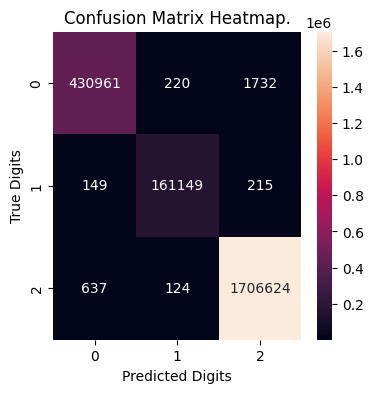

In [ ]:
CM_RF = plot(Random_Forest_model,X_test,y_test)
print('\033[1mFor Random Forest Classifier:\033[0m\n')
CM_RF.c_matrix()

For Decision Tree:

Accuracy is: 99.641%


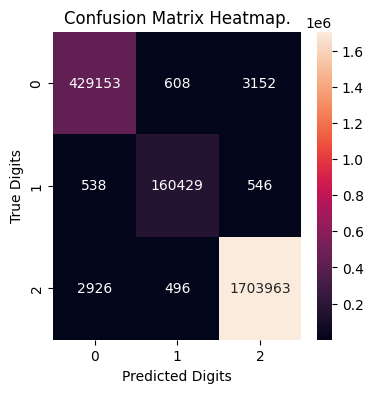

In [ ]:
CM_DT = plot(Decision_Tree_model,X_test,y_test)
print('\033[1mFor Decision Tree:\033[0m\n')
CM_DT.c_matrix()

For Logistic Regression:

Accuracy is: 74.204%


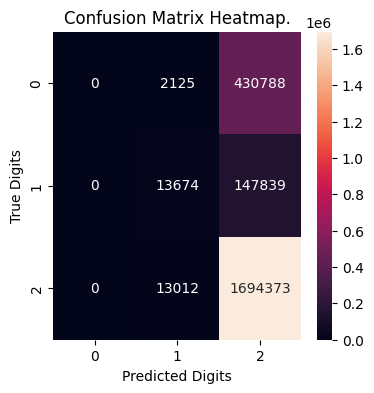

In [ ]:
CM_LR = plot(Logistic_Regression_model,X_test,y_test)
print('\033[1mFor Logistic Regression:\033[0m\n')
CM_LR.c_matrix()

For K-Nearest Neighbor:

Accuracy is: 99.537%


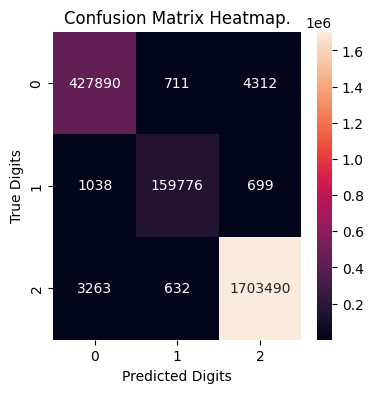

In [ ]:
CM_KNN = plot(KNN_model,X_test,y_test)
print('\033[1mFor K-Nearest Neighbor:\033[0m\n')
CM_KNN.c_matrix()

For Naive Bayes:

Accuracy is: 73.132%


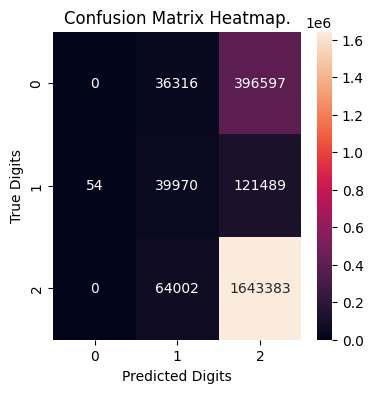

In [ ]:
CM_NB = plot(Naive_Bayes_Model,X_test,y_test)
print('\033[1mFor Naive Bayes:\033[0m\n')
CM_NB.c_matrix()

In [ ]:
# Creating a class 'performance'
class performance:
# Constructor to initialize the class instance
  def __init__(self,model,X_test,y_test):
    '''
    Parameters:
        - model: The machine learning model for evaluation.
        - X_eval: Feature matrix for testing.
        - y_eval: Target variable for testing.
    '''
    self.model = model
    self.X_test = X_test
    self.y_test = y_test
# Method to calculate and print performance measures
  def measures(self):
    # Make predictions using the model
    y_pred = self.model.predict(self.X_test)
    # Calculate performance measures
    accuracy = accuracy_score(self.y_test,y_pred)
    precision = precision_score(self.y_test,y_pred,average='weighted', zero_division=1)
    recall = recall_score(self.y_test,y_pred,average='weighted')
    f1 = f1_score(self.y_test,y_pred,average='weighted')
    # Print the performance measures
    print(f"Accuracy:{accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1 Score: {f1:.3f}\n")
    # Return the performance measures as a list
    return [accuracy,precision,recall,f1]

In [ ]:
Random_Forest = performance(Random_Forest_model,X_test,y_test)
print('\033[1mFor Random Forest Classifier:\033[0m\n')
Performace_Measure_Score_RF = Random_Forest.measures()
Performace_Measure_Score_RF

For Random Forest Classifier:

Accuracy:0.999
Precision: 0.999
Recall: 0.999
F1 Score: 0.999



[0.9986632264768914, 0.998662872923538, 0.9986632264768914, 0.998662619161965]

In [ ]:
Decision_Tree = performance(Decision_Tree_model,X_test,y_test)
print('\033[1mFor Decision Tree:\033[0m\n')
Performace_Measure_Score_DT = Decision_Tree.measures()
Performace_Measure_Score_DT

For Decision Tree:

Accuracy:0.996
Precision: 0.996
Recall: 0.996
F1 Score: 0.996



[0.9964089145459814,
 0.9964082039236222,
 0.9964089145459814,
 0.9964085323201141]

In [ ]:
Logistic_Regression = performance(Logistic_Regression_model,X_test,y_test)
print('\033[1mFor Logistic Regression:\033[0m\n')
Performace_Measure_Score_LR = Logistic_Regression.measures()
Performace_Measure_Score_LR

For Logistic Regression:

Accuracy:0.742
Precision: 0.774
Recall: 0.742
F1 Score: 0.642



[0.7420448507718488,
 0.7743088892054664,
 0.7420448507718488,
 0.6415860018575973]

In [ ]:
KNN = performance(KNN_model,X_test,y_test)
print('\033[1mFor K-Nearest Neighbor:\033[0m\n')
Performace_Measure_Score_KNN = KNN.measures()
Performace_Measure_Score_KNN

For K-Nearest Neighbor:

Accuracy:0.995
Precision: 0.995
Recall: 0.995
F1 Score: 0.995



[0.9953710361102628,
 0.9953679098625728,
 0.9953710361102628,
 0.9953691607858347]

In [ ]:
Naive_Bayes = performance(Naive_Bayes_Model,X_test,y_test)
print('\033[1mFor Naive Bayes:\033[0m\n')
Performace_Measure_Score_NB = Naive_Bayes.measures()
Performace_Measure_Score_NB

For Naive Bayes:

Accuracy:0.731
Precision: 0.584
Recall: 0.731
F1 Score: 0.649



[0.7313167762253286,
 0.5839560353222678,
 0.7313167762253286,
 0.6487420474908003]

In [ ]:
performance_measure = [Performace_Measure_Score_RF,Performace_Measure_Score_DT,Performace_Measure_Score_LR,Performace_Measure_Score_KNN,Performace_Measure_Score_NB]

In [ ]:
Accuracy = []
Precision = []
Recall = []
F1_Score = []
for i in performance_measure:
  Accuracy.append(i[0])
  Precision.append(i[1])
  Recall.append(i[2])
  F1_Score.append(i[3])


In [ ]:
Algorithms = ["Random_Forest","Decision_Tree","Logistic_Regression","K-Nearest Neighbor","Naive Bayes"]

In [ ]:
metrics_df = pd.DataFrame({"Accuracy":Accuracy,"Precision":Precision,"Recall":Recall,"F1_Score":F1_Score},index=Algorithms)
metrics_df

,Accuracy,Precision,Recall,F1_Score
Random_Forest,0.998663,0.998663,0.998663,0.998663
Decision_Tree,0.996409,0.996408,0.996409,0.996409
Logistic_Regression,0.742045,0.774309,0.742045,0.641586
K-Nearest Neighbor,0.995371,0.995368,0.995371,0.995369
Naive Bayes,0.731317,0.583956,0.731317,0.648742


In [ ]:
color_scale = 'YlGnBu'
fig = go.Figure(data=[go.Bar(x=Algorithms, y=Accuracy,marker=dict(color=Accuracy, colorscale=color_scale))])
fig.update_layout(
    title='Accuracy_Comparision',
    title_font=dict(size=20, family='Arial', color='black'),
    xaxis=dict(title='Algorithms'),
    yaxis=dict(title='Accuracy'),
    bargap=0.5,
    bargroupgap=0.3
)
fig.show()

In [ ]:
color_scale = 'YlGnBu'
fig = go.Figure(data=[go.Bar(x=Algorithms, y=Precision,marker=dict(color=Precision, colorscale=color_scale))])
fig.update_layout(
    title='Precision_Comparision',
    title_font=dict(size=20, family='Arial', color='black'),
    xaxis=dict(title='Algorithms'),
    yaxis=dict(title='Precision'),
    bargap=0.5,
    bargroupgap=0.3
)
fig.show()

In [ ]:
color_scale = 'YlGnBu'
fig = go.Figure(data=[go.Bar(x=Algorithms, y=Recall,marker=dict(color=Recall, colorscale=color_scale))])
fig.update_layout(
    title='Recall_Comparision',
    title_font=dict(size=20, family='Arial', color='black'),
    xaxis=dict(title='Algorithms'),
    yaxis=dict(title='Recall_Score'),
    bargap=0.5,
    bargroupgap=0.3
)
fig.show()

In [ ]:
color_scale = 'YlGnBu'
fig = go.Figure(data=[go.Bar(x=Algorithms, y=F1_Score,marker=dict(color=F1_Score, colorscale=color_scale))])
fig.update_layout(
    title='F1_Score_Comparision',
    title_font=dict(size=20, family='Arial', color='black'),
    xaxis=dict(title='Algorithms'),
    yaxis=dict(title='F1_Score'),
    bargap=0.5,
    bargroupgap=0.3
)
fig.show()